# Under the hood

In the previous tutorials, we have seen how the simulator generates decodable multivariate data. But what is happening under the hood? What does single-channel data look like? How are the data generated? In this section, we will explore the simulator's inner workings.

## 1. Setting up the simulation

We will stick to the same parameters as before, except that we will only simulate one subject and one channel.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Creating the design matrix of our 2 by two balanced design:
X = np.array([[1, 1, -1, -1] * 40, [1, -1] * 80]).T

# Add descriptors:
cond_names = ["category", "attention"]
X = pd.DataFrame(X, columns=cond_names)  # Add a column for the interaction between category and attention
mapping = {
    "category": {1: "face", -1: "object"},
    "attention": {1: "attended", -1: "unattended"},
}

# Specifying the effects:
effects = [
    {"condition": 'category', "windows": [0.1, 0.2], "effect_amp": 5}, 
    {"condition": 'category', "windows": [0.3, 0.4], "effect_amp": 5}
    ]  # Packaging them in a list to pass to the simulator class

# Data parameters:
n_channels = 1  # EEG system with 32 electrodes
noise_std = 1  # Variance of the data
ch_cov = None  # Assuming that the data of each sensor are independent
sfreq = 50  # Simulating data at 50Hz
tmin = -0.25
tmax = 1.0

n_subjects = 1

from multisim import Simulator

sims = Simulator(
    X,  # Design matrix
    effects, # Effects to simulate
    noise_std,  # Observation noise
    n_channels,  # Number of channelss
    n_subjects,  # Number of subjects
    tmin,
    tmax,  # Start and end of epochs
    sfreq,  # Sampling frequency of the data
    ch_cov=ch_cov,  # Spatial covariance of the data
    random_state=42,  # Random state for reproducibility
)
epochs = sims.export_to_mne(X=X.copy(), mapping=mapping)[0]

## 5. Vizualizing the data:
We can have a quick look at our simulated data. It won't look like much, given that we have simulated multivariate effects without much else at all. It won't look like actual MEG/EEG data:

Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated


C:\Users\qian.chu\AppData\Local\Temp\ipykernel_18876\3029965952.py:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks=[0], scalings=scalings)


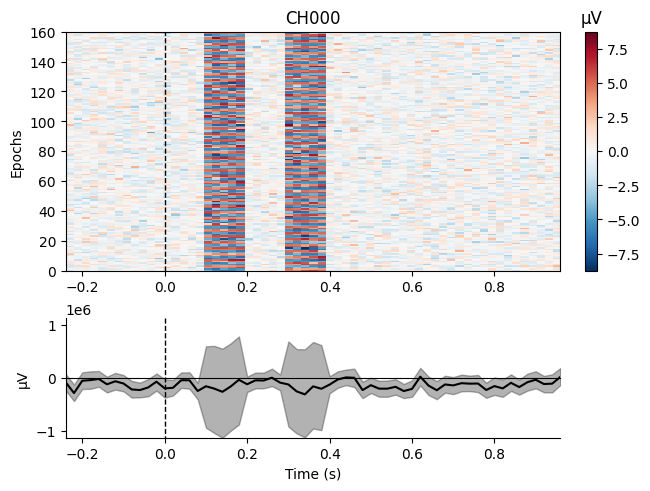

[<Figure size 640x480 with 3 Axes>]

In [18]:
scalings = dict(eeg=1)  # Scaling for plotting
epochs.plot_image(picks=[0], scalings=scalings)

Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated


C:\Users\qian.chu\AppData\Local\Temp\ipykernel_18876\3705675671.py:4: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs[X_category.groups[1]].plot_image(picks=[0], scalings=scalings, title="Category = 1")


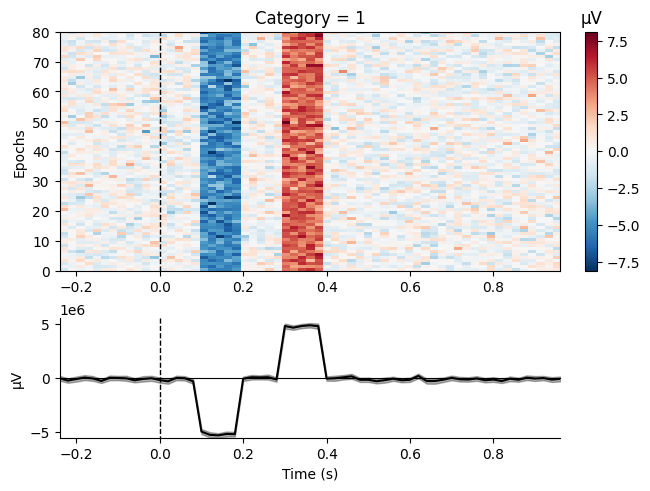

Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated


C:\Users\qian.chu\AppData\Local\Temp\ipykernel_18876\3705675671.py:5: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs[X_category.groups[-1]].plot_image(picks=[0], scalings=scalings, title="Category = -1")


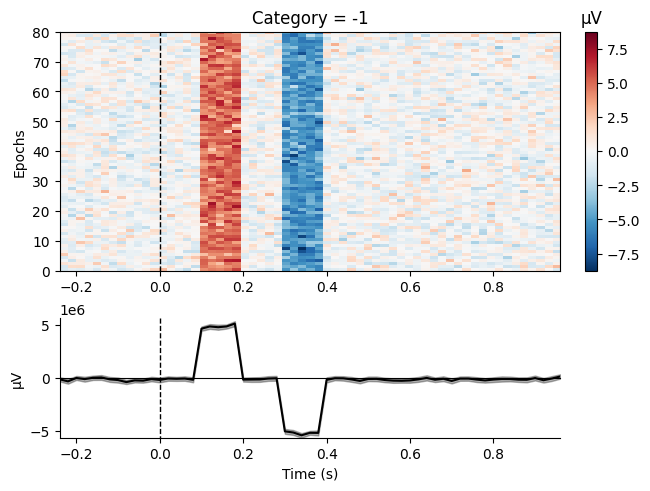

[<Figure size 640x480 with 3 Axes>]

In [19]:
# Plot the category = 1 and category = -1 effects:
X_category = X.groupby("category")

epochs[X_category.groups[1]].plot_image(picks=[0], scalings=scalings, title="Category = 1")
epochs[X_category.groups[-1]].plot_image(picks=[0], scalings=scalings, title="Category = -1")